In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import zipfile
import os
from google.colab import files

: 

In [2]:
uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
for fn in uploaded.keys():
    zip_path = fn

extract_dir = "/content/student_dataset"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

os.listdir(extract_dir)

['student-por.csv']

In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/student_dataset/student-por.csv", sep=';')

df.head()



,"school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3"
0,"GP,""F"",18,""U"",""GT3"",""A"",4,4,""at_home"",""teacher..."
1,"GP,""F"",17,""U"",""GT3"",""T"",1,1,""at_home"",""other"",..."
2,"GP,""F"",15,""U"",""LE3"",""T"",1,1,""at_home"",""other"",..."
3,"GP,""F"",15,""U"",""GT3"",""T"",4,2,""health"",""services..."
4,"GP,""F"",16,""U"",""GT3"",""T"",3,3,""other"",""other"",""h..."


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df.head()


,"school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3"
0,"GP,""F"",18,""U"",""GT3"",""A"",4,4,""at_home"",""teacher"",""course"",""mother"",2,2,0,""yes"",""no"",""no"",""no"",""yes"",""yes"",""no"",""no"",4,3,4,1,1,3,4,""0"",""11"",11"
1,"GP,""F"",17,""U"",""GT3"",""T"",1,1,""at_home"",""other"",""course"",""father"",1,2,0,""no"",""yes"",""no"",""no"",""no"",""yes"",""yes"",""no"",5,3,3,1,1,3,2,""9"",""11"",11"
2,"GP,""F"",15,""U"",""LE3"",""T"",1,1,""at_home"",""other"",""other"",""mother"",1,2,0,""yes"",""no"",""no"",""no"",""yes"",""yes"",""yes"",""no"",4,3,2,2,3,3,6,""12"",""13"",12"
3,"GP,""F"",15,""U"",""GT3"",""T"",4,2,""health"",""services"",""home"",""mother"",1,3,0,""no"",""yes"",""no"",""yes"",""yes"",""yes"",""yes"",""yes"",3,2,2,1,1,5,0,""14"",""14"",14"
4,"GP,""F"",16,""U"",""GT3"",""T"",3,3,""other"",""other"",""home"",""father"",1,2,0,""no"",""yes"",""no"",""no"",""yes"",""yes"",""no"",""no"",4,3,2,1,2,5,0,""11"",""13"",13"


In [8]:
possible_paths = [
    "/mnt/data/student_dataset/Portuguese.csv",
    "/mnt/data/student_dataset/student-por.csv",
    "/content/student_dataset/Portuguese.csv",
    "/content/student_dataset/student-por.csv",
    "/mnt/data/student_dataset/Maths.csv",        # fallback (if math file exists)
    "/mnt/data/student_dataset/student-mat.csv"
]


In [9]:
data_path = None
for p in possible_paths:
    if os.path.exists(p):
        data_path = p
        break

In [10]:
if data_path is None:
    raise FileNotFoundError(
        "Dataset not found in expected locations. Upload the CSV and set data_path accordingly."
    )

In [11]:
try:
    df = pd.read_csv(data_path, sep=';')
except Exception as e:
    # Try automatic engine detection if semicolon fails
    df = pd.read_csv(data_path, sep=None, engine='python')


In [12]:
print("Loaded:", data_path)
print("Shape:", df.shape)
display(df.head())

Loaded: /content/student_dataset/student-por.csv
Shape: (649, 1)


,"school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3"
0,"GP,""F"",18,""U"",""GT3"",""A"",4,4,""at_home"",""teacher"",""course"",""mother"",2,2,0,""yes"",""no"",""no"",""no"",""yes"",""yes"",""no"",""no"",4,3,4,1,1,3,4,""0"",""11"",11"
1,"GP,""F"",17,""U"",""GT3"",""T"",1,1,""at_home"",""other"",""course"",""father"",1,2,0,""no"",""yes"",""no"",""no"",""no"",""yes"",""yes"",""no"",5,3,3,1,1,3,2,""9"",""11"",11"
2,"GP,""F"",15,""U"",""LE3"",""T"",1,1,""at_home"",""other"",""other"",""mother"",1,2,0,""yes"",""no"",""no"",""no"",""yes"",""yes"",""yes"",""no"",4,3,2,2,3,3,6,""12"",""13"",12"
3,"GP,""F"",15,""U"",""GT3"",""T"",4,2,""health"",""services"",""home"",""mother"",1,3,0,""no"",""yes"",""no"",""yes"",""yes"",""yes"",""yes"",""yes"",3,2,2,1,1,5,0,""14"",""14"",14"
4,"GP,""F"",16,""U"",""GT3"",""T"",3,3,""other"",""other"",""home"",""father"",1,2,0,""no"",""yes"",""no"",""no"",""yes"",""yes"",""no"",""no"",4,3,2,1,2,5,0,""11"",""13"",13"


In [13]:
pd.set_option('display.max_columns', None)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Data types:
 school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3    object
dtype: object

Missing values:
 school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3    0
dtype: int64


In [16]:
print(df.columns)


Index(['school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3'], dtype='object')


In [17]:
# Auto-detect possible G3 column
possible_targets = ["G3", "G3 ", " G3", "g3", "final_grade"]
found_target = None

for col in df.columns:
    if col.strip().lower() == "g3":
        found_target = col
        break

print("Detected target column:", found_target)


Detected target column: None


In [18]:
df.columns.tolist()


['school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3']

In [20]:
import pandas as pd

df = pd.read_csv("/content/archive.zip", sep=";")
print(df.columns.tolist())


['school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3']


In [21]:
print(df.head())


  school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0                                                                                        GP,"F",18,"U","GT3","A",4,4,"at_home","teacher","course","mother",2,2,0,"yes","no","no","no","yes","yes","no","no",4,3,4,1,1,3,4,"0","11",11
1                                                                                          GP,"F",17,"U","GT3","T",1,1,"at_home","other","course","father",1,2,0,"no","yes","no","no","no","yes","yes","no",5,3,3,1,1,3,2,"9","11",11
2                                                                                         GP,"F",15,"U","LE3","T",1,1,"at_home","other","other","mother",1,2,0,"yes","no","no","no","yes","yes","yes","no",4,3,2,2,3,3,6,"12","13",12
3                                                                               

In [22]:
df = pd.read_csv("/content/archive.zip", sep=",", quotechar='"')


In [23]:
print(df.columns)
print(df.head())


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  c

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
# 2. LOAD DATASET
# -------------------------------------
df = pd.read_csv("/content/archive.zip")   # update path if needed

print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famr

In [29]:
# 3. CHECK FOR NULL VALUES
# -------------------------------------
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [30]:
# 4. BASIC DATA INFO
# -------------------------------------
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object


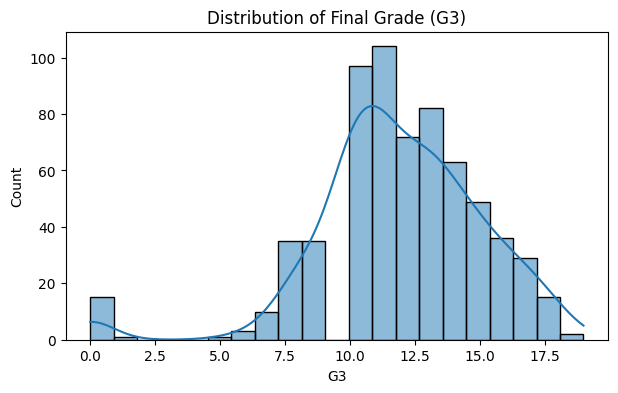

In [31]:
# 5. VISUALIZE TARGET VARIABLE G3
# -------------------------------------
plt.figure(figsize=(7,4))
sns.histplot(df["G3"], kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.show()


In [32]:
# 6. ENCODE CATEGORICAL VARIABLES
# -------------------------------------
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\nAfter Encoding:")
print(df.head())


After Encoding:
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       0    0   18        1        0        0     4     4     0     4   
1       0    0   17        1        0        1     1     1     0     2   
2       0    0   15        1        1        1     1     1     0     2   
3       0    0   15        1        0        1     4     2     1     3   
4       0    0   16        1        0        1     3     3     2     2   

   reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0       0         1           2          2         0          1       0     0   
1       0         0           1          2         0          0       1     0   
2       2         1           1          2         0          1       0     0   
3       1         1           1          3         0          0       1     0   
4       1         0           1          2         0          0       1     0   

   activities  nursery  higher  internet  romantic 

In [33]:
# 7. FEATURE SELECTION (X = all except G3)
# -------------------------------------
X = df.drop("G3", axis=1)
y = df["G3"]


In [34]:
# 8. TRAIN / TEST SPLIT
# -------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData Split Done!")



Data Split Done!


In [35]:
# 9A. MODEL 1: LINEAR REGRESSION
# -------------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n--- LINEAR REGRESSION RESULTS ---")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


--- LINEAR REGRESSION RESULTS ---
MSE: 1.437093704240998
R² Score: 0.8526317103852281


In [36]:
# 9B. MODEL 2: DECISION TREE
# -------------------------------------
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n--- DECISION TREE RESULTS ---")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))



--- DECISION TREE RESULTS ---
MSE: 2.1995669934112767
R² Score: 0.7744430827610338


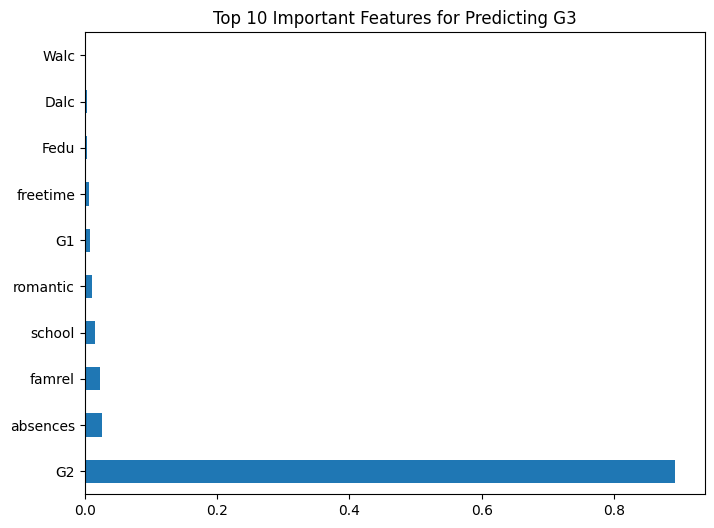

In [37]:
# 10. FEATURE IMPORTANCE (Decision Tree)
# -------------------------------------
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Important Features for Predicting G3")
plt.show()